<a href="https://colab.research.google.com/github/wcj365/python-stats-dataviz/blob/master/assignments/Assignment-04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
# <1> 
# Import libraries

import matplotlib.pyplot as plt
import numpy as ny
import seaborn as sns


In [163]:
# <2>
# load the 2017-2018 school year file "MERGED2017_18_PP.csv" 
# Don't include all columns - too many and take up computer resources (computeing power and memory)
# Only load the following 10 columns should be loaded:
# UNITID: 
# OPEID:              
# OPEID6:            
# INSTNM:          
# CITY:                      
# ZIP:               
# ADM_RATE:           
# UGDS:              
# TUITIONFEE_IN:      

file=pd.read_csv(r"C:\Users\Prashant Mourya\Downloads\CollegeScorecard_Raw_Data\MERGED2017_18_PP.csv",low_memory=False,usecols=["UNITID","OPEID","OPEID6","INSTNM","CITY","ZIP","ADM_RATE","UGDS","TUITIONFEE_IN"])
file

,UNITID,OPEID,OPEID6,INSTNM,CITY,ZIP,ADM_RATE,UGDS,TUITIONFEE_IN
0,100654,100200,1002,Alabama A & M University,Normal,35762,0.9027,4824.0,9857.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,35294-0110,0.9181,12866.0,8328.0
2,100690,2503400,25034,Amridge University,Montgomery,36117-3553,NaN,322.0,6900.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,35899,0.8123,6917.0,10280.0
4,100724,100500,1005,Alabama State University,Montgomery,36104-0271,0.9787,4189.0,11068.0
...,...,...,...,...,...,...,...,...,...
7107,48312404,108163,1081,Arizona State University at Yuma,Yuma,853656900,NaN,NaN,NaN
7108,48387801,4223701,42237,Bay Area Medical Academy - San Jose Satellite ...,San Jose,95113,NaN,NaN,NaN
7109,48400201,4228101,42281,High Desert Medical College,Lancaster,935340000,NaN,NaN,NaN
7110,48778201,4221501,42215,BCI - Malden,Malden,021480000,NaN,NaN,NaN


In [164]:
# <3>
# Load the scorecard file Most-Recent-Cohorts-Scorecard-Elements.csv from the link:
# https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-Scorecard-Elements.csv
# This file has thre median earnings which is not present in the previous file
# Only load the two columns:
# UNITID - This column is the unique identity for each college and will be used to join with the previous file
# MD_EARN_WNE_P10  - This column has the median earnings

score_card=pd.read_csv(r"C:\Users\Prashant Mourya\Downloads\Most-Recent-Cohorts-Scorecard-Elements.csv",low_memory=False,usecols=["UNITID","MD_EARN_WNE_P10"])

score_card


,UNITID,MD_EARN_WNE_P10
0,100654,31000
1,100663,41200
2,100690,39600
3,100706,46700
4,100724,27700
...,...,...
7107,48312404,NaN
7108,48387801,NaN
7109,48400201,NaN
7110,48778201,NaN


In [165]:
# <4> 
# Explore this file - number of colleges, head/tail/sample etc.
# Notice this file has different number of colleges from the previous file
# This indicate they are not identical and they overlap (they don't contain the same set of colleges)
score_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Data columns (total 2 columns):
UNITID             7112 non-null int64
MD_EARN_WNE_P10    5887 non-null object
dtypes: int64(1), object(1)
memory usage: 111.2+ KB


In [167]:
# <5>
#Join the two files together to produce a third file which contain all the columns and all colleges that are common to both files
new_file=pd.merge(file,score_card,on='UNITID')
new_file

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7112 entries, 0 to 7111
Data columns (total 10 columns):
UNITID             7112 non-null int64
OPEID              7112 non-null int64
OPEID6             7112 non-null int64
INSTNM             7112 non-null object
CITY               7112 non-null object
ZIP                7112 non-null object
ADM_RATE           2037 non-null float64
UGDS               6364 non-null float64
TUITIONFEE_IN      4021 non-null float64
MD_EARN_WNE_P10    5887 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 611.2+ KB


In [170]:
# <6>
# Explore the new file - number of colleges, head/tail/sample etc.
print(new_file.count())
new_file.head()

UNITID             7112
OPEID              7112
OPEID6             7112
INSTNM             7112
CITY               7112
ZIP                7112
ADM_RATE           2037
UGDS               6364
TUITIONFEE_IN      4021
MD_EARN_WNE_P10    5887
dtype: int64


,UNITID,OPEID,OPEID6,INSTNM,CITY,ZIP,ADM_RATE,UGDS,TUITIONFEE_IN,MD_EARN_WNE_P10
0,100654,100200,1002,Alabama A & M University,Normal,35762,0.9027,4824.0,9857.0,31000
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,35294-0110,0.9181,12866.0,8328.0,41200
2,100690,2503400,25034,Amridge University,Montgomery,36117-3553,NaN,322.0,6900.0,39600
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,35899,0.8123,6917.0,10280.0,46700
4,100724,100500,1005,Alabama State University,Montgomery,36104-0271,0.9787,4189.0,11068.0,27700


In [171]:
# <7>
# Find out the top 100 colleges that are hardest to get in (Top 100) from this new file
columns = ['MD_EARN_WNE_P10','TUITIONFEE_IN']
formatted_df = new_file.replace('PrivacySuppressed', pd.np.nan).dropna(axis=0, how='any', subset=columns)
formatted_df
top_100=formatted_df.nsmallest(100, 'ADM_RATE')
top_100

,UNITID,OPEID,OPEID6,INSTNM,CITY,ZIP,ADM_RATE,UGDS,TUITIONFEE_IN,MD_EARN_WNE_P10
5226,448309,159101,1591,Shorter University-College of Adult & Professi...,Rome,30165,0.0000,113.0,9680.0,43200
3979,243744,130500,1305,Stanford University,Stanford,94305,0.0473,7056.0,49617.0,94000
1557,166027,215500,2155,Harvard University,Cambridge,02138,0.0516,7532.0,48949.0,89700
2302,192110,274200,2742,The Juilliard School,New York,10023-6588,0.0592,486.0,43170.0,32800
2123,186131,262700,2627,Princeton University,Princeton,08544-0070,0.0641,5246.0,47140.0,74700
...,...,...,...,...,...,...,...,...,...,...
2367,194499,1235800,12358,Plaza College,Forest Hills,11375,0.3007,811.0,12450.0,23500
3035,213385,328400,3284,Lafayette College,Easton,18042-1768,0.3081,2567.0,51600.0,68600
1375,159382,201100,2011,Louisiana State University-Alexandria,Alexandria,71302-9121,0.3107,2662.0,6668.0,33700
2959,211291,323800,3238,Bucknell University,Lewisburg,17837,0.3108,3588.0,53986.0,70800


In [172]:
# <8>
# Display the summary statistics of the in-state tuitions of the top 100 colleges that are hardest to get in
top_100['TUITIONFEE_IN'].describe()

count      100.000000
mean     37534.240000
std      18432.505958
min       1020.000000
25%      16918.250000
50%      49640.500000
75%      52666.000000
max      57208.000000
Name: TUITIONFEE_IN, dtype: float64

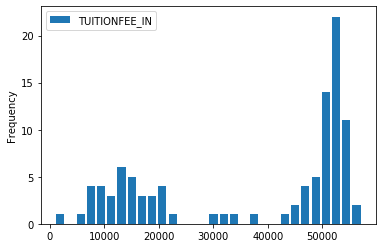

In [187]:
# <9>
# Display the histogram of the in-state tuitions of the top 100 colleges that are hardest to get in
top_100.plot(y='TUITIONFEE_IN',bins=30,rwidth=0.8,kind='hist')


In [174]:
# <10>
# Display the summary statistics of the earning potentials of the top 100 colleges that are hardest to get in


top_100['MD_EARN_WNE_P10']=top_100['MD_EARN_WNE_P10'].astype('int')
top_100['MD_EARN_WNE_P10'].describe()


count       100.000000
mean      59389.000000
std       18939.797739
min       23500.000000
25%       45150.000000
50%       60700.000000
75%       71325.000000
max      104700.000000
Name: MD_EARN_WNE_P10, dtype: float64

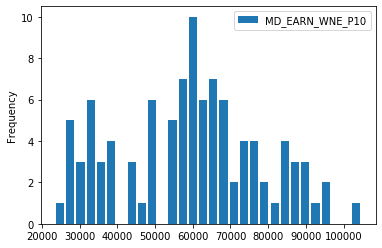

In [186]:
# <11>
# Display the histogram of the earning potentials of the top 100 colleges that are hardest to get in
top_100.plot(y='MD_EARN_WNE_P10',bins=30,rwidth=0.8,kind='hist')


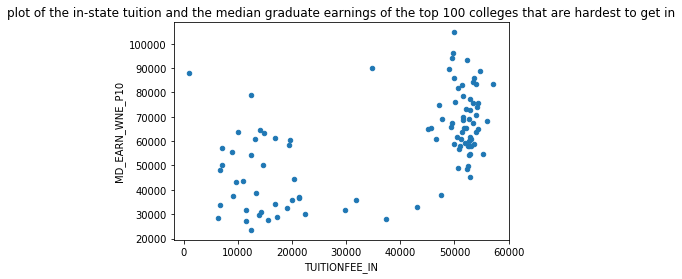

In [185]:
# <12>
# Make a scatter plot of the in-state tuition and the median graduate earnings of 
# the top 100 colleges that are hardest to get in
# using Pandas
top_100.plot(x ='TUITIONFEE_IN', y='MD_EARN_WNE_P10', kind = 'scatter',title='plot of the in-state tuition and the median graduate earnings of the top 100 colleges that are hardest to get in')


Text(0.5, 1.0, 'plot of the in-state tuition and the median graduate earnings of the top 100 colleges that are hardest to get in')

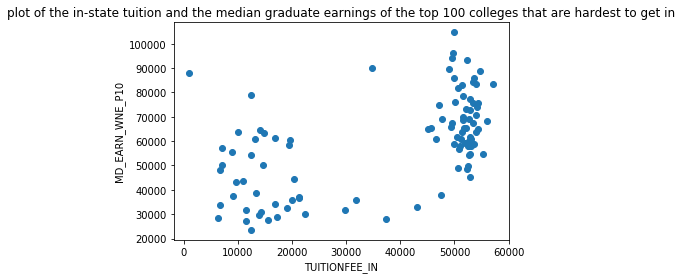

In [149]:
# <13>
# Make a scatter plot of the in-state tuition and the median graduate earnings of 
# the top 100 colleges that are hardest to get in
# using Matplotlib
plt.scatter(top_100.TUITIONFEE_IN, top_100.MD_EARN_WNE_P10)
plt.xlabel("TUITIONFEE_IN")
plt.ylabel("MD_EARN_WNE_P10")
plt.title("plot of the in-state tuition and the median graduate earnings of the top 100 colleges that are hardest to get in")

Text(0.5, 1.0, 'plot of the in-state tuition and the median graduate earnings of the top 100 colleges that are hardest to get in')

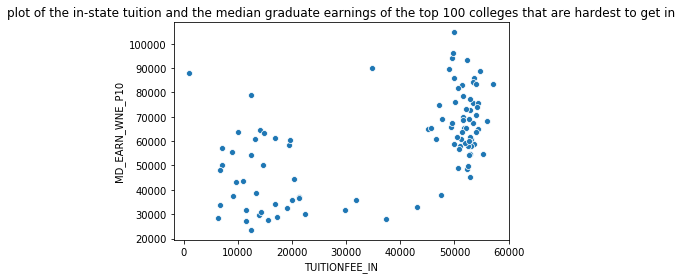

In [190]:
# <14>
# Make a scatter plot of the in-state tuition and the median graduate earnings of 
# the top 100 colleges that are hardest to get in
# using Seaborn
sns.scatterplot(x="TUITIONFEE_IN", y="MD_EARN_WNE_P10", data=top_100).set_title('plot of the in-state tuition and the median graduate earnings of the top 100 colleges that are hardest to get in')


In [0]:
# <15> 
# Your observation/conclusion of the scatter plot (use the following Markdown cell)

#### Based on my observation of the scatter plot,
#### The two variables TUITIONFEE_IN (in-state tuition) and median graduate earnings (MD_EARN_WNE_P10) are related 
#### to each other in the sense that if the tutition fee in more the median graduate earnings of the students in high than 
#### compared to the earnings of the students where the tutition fee is less.
